<a href="https://colab.research.google.com/github/Aaditya14x/MachineLearning/blob/main/Copy_of_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=12,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/12
235/235 [==============================] - 5s 14ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 2/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 3/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 4/12
235/235 [==============================] - 4s 17ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 5/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 6/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6928 - val_loss: 0.6926
Epoch 7/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6925 - val_loss: 0.6923
Epoch 8/12
235/235 [==============================] - 4s 16ms/step - loss: 0.6922 - val_loss: 0.6920
Epoch 9/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6919 - val_loss: 0.6917
Epoch 10/12
235/235 [==============================] - 3s 13ms/step - loss: 0.6916 - val_lo

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


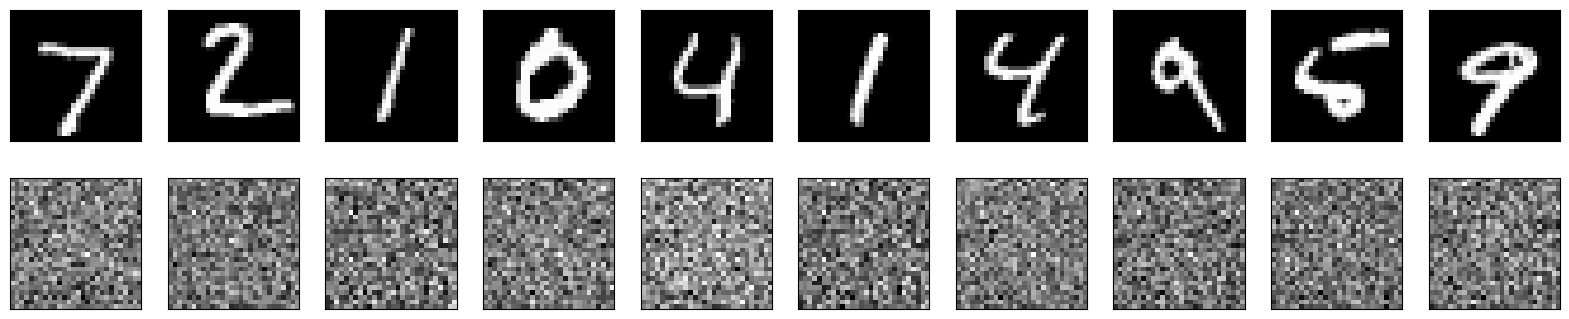

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of the encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
7500/7500 [==============================] - 50s 6ms/step - loss: 0.1295 - val_loss: 0.1043
Epoch 2/50
7500/7500 [==============================] - 49s 7ms/step - loss: 0.1009 - val_loss: 0.0957
Epoch 3/50
7500/7500 [==============================] - 50s 7ms/step - loss: 0.0950 - val_loss: 0.0915
Epoch 4/50
7500/7500 [==============================] - 53s 7ms/step - loss: 0.0922 - val_loss: 0.0902
Epoch 5/50
7500/7500 [==============================] - 48s 6ms/step - loss: 0.0904 - val_loss: 0.0900
Epoch 6/50
7500/7500 [==============================] - 48s 6ms/step - loss: 0.0891 - val_loss: 0.0875
Epoch 7/50
7500/7500 [==============================] - 49s 6ms/step - loss: 0.0880 - val_loss: 0.0858
Epoch 8/50
7500/7500 [==============================] - 50s 7ms/step - loss: 0.0869 - val_loss: 0.0867
Epoch 9/50
7500/7500 [==============================] - 48s 6ms/step - loss: 0.0861 - val_loss: 0.0848
Epoch 10/50
7500/7500 [==============================] - 48s 6ms/step - l

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


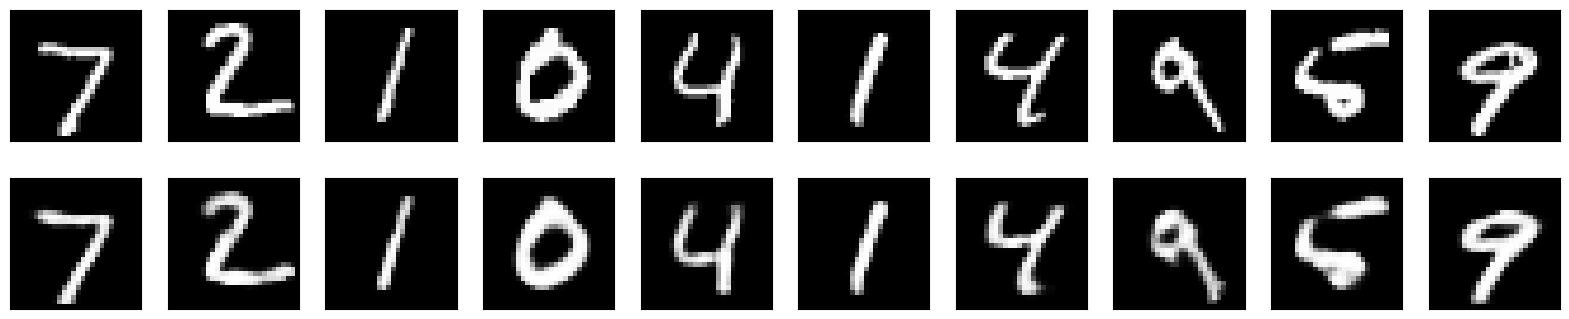

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()